### Expt Number : 4
#### Title : Generating Chain-code for edge detection of objects in images
PRN number : 1032210233
#### Name : Nishant S Soman   
Div : A               
Batch : A4
#### Date of performance : 14/02/2024

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(200, 200, 3)


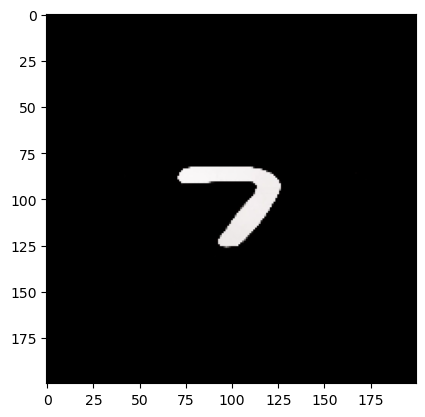

In [74]:
image_path ='seven.png'
x = cv2.imread(image_path)
#x=cv2.resize(x,(200,200))
#cv2.imwrite('seven.png', x)
plt.imshow(x);
print(x.shape)

In [75]:
# Generate the 4-direction chain code for edge detection
(chain_4d,contour) = (generate_4_direction_chain(image_path))
'''np.uint8'''

'np.uint8'

In [76]:
print(np.uint8(chain_4d))

[1 2 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 2 3 2 2 2 2 2 2 2]


In [77]:
#print(contour[0])
conter=[]
for i in range(len(contour)):
    conter.append(contour[i])

conter = [tuple(point[0]) for point in contour]
print(conter)

[(77, 83), (76, 84), (74, 84), (72, 86), (72, 87), (71, 88), (71, 89), (73, 91), (88, 91), (89, 90), (111, 90), (114, 93), (114, 94), (113, 95), (113, 97), (107, 103), (107, 104), (102, 109), (102, 110), (100, 112), (100, 113), (98, 115), (98, 116), (94, 120), (94, 121), (93, 122), (93, 124), (94, 125), (96, 125), (97, 126), (98, 125), (103, 125), (106, 122), (107, 122), (107, 121), (115, 113), (115, 112), (118, 109), (118, 108), (120, 106), (120, 105), (121, 104), (121, 103), (123, 101), (123, 100), (124, 99), (124, 98), (125, 97), (125, 96), (126, 95), (126, 92), (125, 91), (125, 90), (121, 86), (119, 86), (118, 85), (117, 85), (116, 84), (112, 84), (111, 83)]


In [78]:
# Generate the 8-direction chain code for edge detection
chain_8d,contour_ = (generate_8_direction_chain(image_path))
print(chain_8d)

[3, 4, 3, 2, 3, 2, 1, 0, 7, 0, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 7, 0, 7, 0, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 5, 6, 5, 4, 5, 4, 5, 4, 5]


In [45]:
print(np.uint8(chain_8d))

[3 4 3 2 3 2 1 0 7 0 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 0 1 7 0 7 0 6 7 6 7
 6 7 6 7 6 7 6 7 6 7 6 7 6 5 6 5 4 5 4 5 4 5]


------------------------------------

##### Reqired Functions

In [82]:
def get_4_direction(prev_point, current_point):
    x_diff = current_point[0] - prev_point[0]
    y_diff = current_point[1] - prev_point[1]

    if x_diff > 0:
        return 0  # Positive x-direction
    elif y_diff > 0:
        return 1  # Positive y-direction
    elif x_diff < 0:
        return 2  # Negative x-direction
    elif y_diff < 0:
        return 3  # Negative y-direction
    else:
        return -1  # No movement

def generate_4_direction_chain(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to obtain a binary image (adjust the threshold as needed)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour represents the object of interest
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the contour on a copy of the original image
    result_image = image.copy()
    cv2.drawContours(result_image, [largest_contour], -1, (0, 255, 0), 2)

    # Save the result image
    cv2.imwrite('result_img_4d.png', result_image)

    # Extract chain code from the largest contour using the restricted movement function
    chain_code = []
    prev_point = largest_contour[0][0]
    for point in largest_contour[1:]:
        current_point = point[0]
        direction = get_4_direction(prev_point, current_point)
        if direction != -1:  # Ignore points with no movement
            chain_code.append(direction)
        prev_point = current_point

    return (chain_code,largest_contour)

In [83]:
def get_8_direction(prev_point, current_point):
    x_diff = current_point[0] - prev_point[0]
    y_diff = current_point[1] - prev_point[1]

    if x_diff > 0:
        if y_diff > 0:
            return 1#######  # Diagonal movement: Positive x, Positive y
        elif y_diff < 0:
            return 7  # Diagonal movement: Positive x, Negative y (Anticlockwise)
        else:
            return 0########  # Horizontal movement: Positive x, No change in y
    elif x_diff < 0:
        if y_diff > 0:
            return 3#######  # Diagonal movement: Negative x, Positive y (Anticlockwise)
        elif y_diff < 0:
            return 5#######  # Diagonal movement: Negative x, Negative y (Anticlockwise)
        else:
            return 4########  # Horizontal movement: Negative x, No change in y
    else:
        if y_diff > 0:
            return 2#######  # Vertical movement: No change in x, Positive y
        elif y_diff < 0:
            return 6#######  # Vertical movement: No change in x, Negative y (Anticlockwise)
        else:
            return -1  # No movement


def generate_8_direction_chain(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to obtain a binary image (adjust the threshold as needed)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour represents the object of interest
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the contour on a copy of the original image
    result_image = image.copy()
    cv2.drawContours(result_image, [largest_contour], -1, (0, 255, 0), 2)

    # Save the result image
    cv2.imwrite('result_img_8d.png', result_image)

    # Extract chain code from the largest contour using the restricted movement function
    chain_code = []
    prev_point = largest_contour[0][0]
    for point in largest_contour[1:]:
        current_point = point[0]
        direction = get_8_direction(prev_point, current_point)
        if direction != -1:  # Ignore points with no movement
            chain_code.append(direction)
        prev_point = current_point

    return (chain_code,largest_contour)

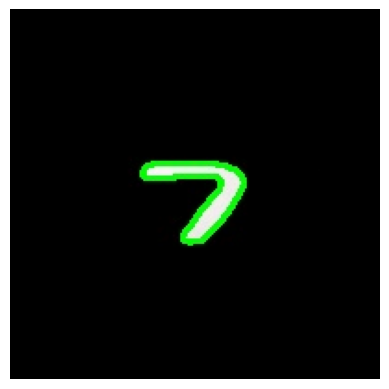

In [86]:
a=cv2.imread('result_img_4d.png');
plt.imshow(a);
plt.axis('off');

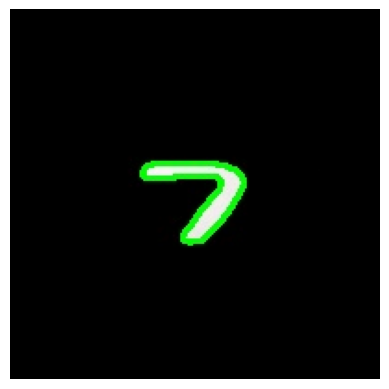

In [87]:
b=cv2.imread('result_img_8d.png');
plt.imshow(b);
plt.axis('off');